In [1]:
# standard
import numpy as np
from numpy.random import randn
import pandas as pd
# stats
from scipy import stats
# plotting 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/Users/jian/anaconda/envs/py27/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
dataset = randn(25)

(0, 1)

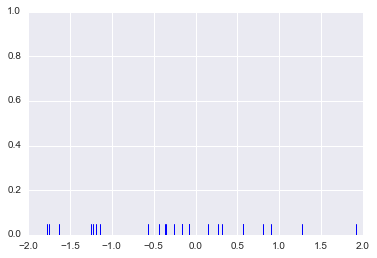

In [3]:
sns.rugplot(dataset)
plt.ylim(0,1)

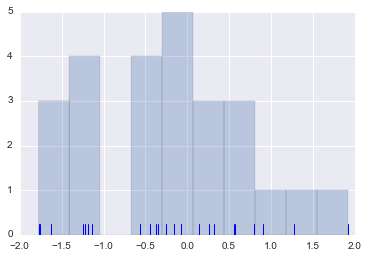

In [4]:
plt.hist(dataset,alpha=.3)
sns.rugplot(dataset)

(0, 1)

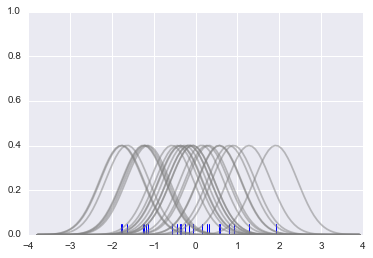

In [5]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2
x_axis = np.linspace(x_min,x_max,100)

bandwidth = ( (4*dataset.std()**5) / (3*len(dataset)) )**.2
kernel_list = []
for data_point in dataset:
    #create a kernel for each point and append it to kernel_list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    # scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color='grey',alpha=.5)
    
plt.ylim(0,1)

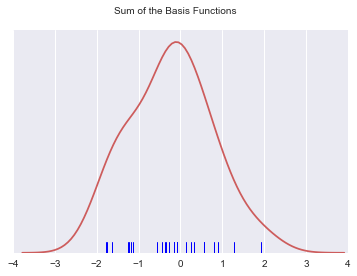

In [6]:
sum_of_kde = np.sum(kernel_list,axis=0)
fig = plt.plot(x_axis,sum_of_kde,color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle("Sum of the Basis Functions")

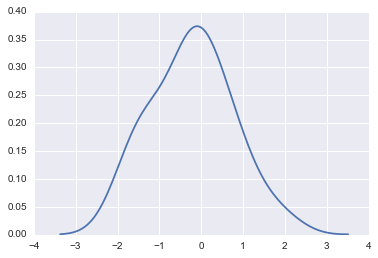

In [7]:
sns.kdeplot(dataset)

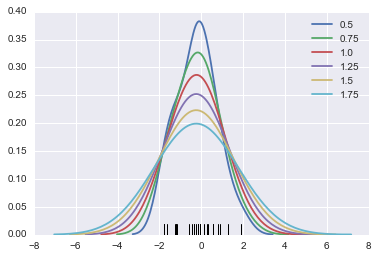

In [8]:
sns.rugplot(dataset,color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

/Users/jian/anaconda/envs/py27/lib/python2.7/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


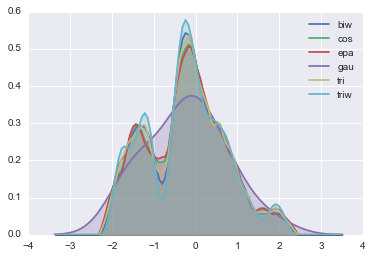

In [9]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True)

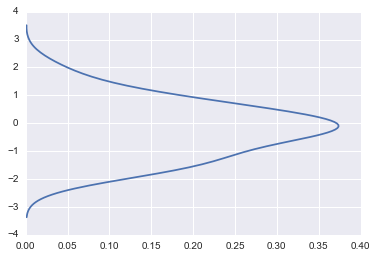

In [10]:
sns.kdeplot(dataset,vertical=True)

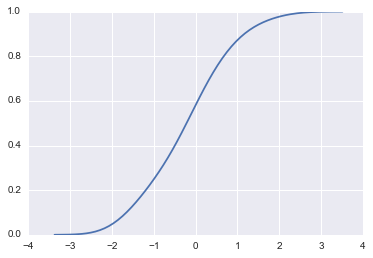

In [11]:
sns.kdeplot(dataset,cumulative=True)

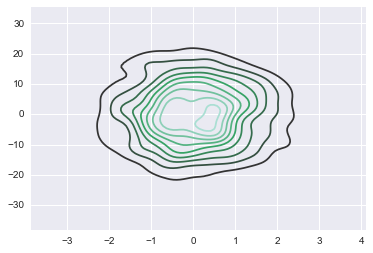

In [12]:
mean = [0,0]
cov = [[1,0],[0,100]]
dataset2 = np.random.multivariate_normal(mean,cov,1000)
dframe = pd.DataFrame(dataset2,columns=['X','Y'])
sns.kdeplot(dframe)

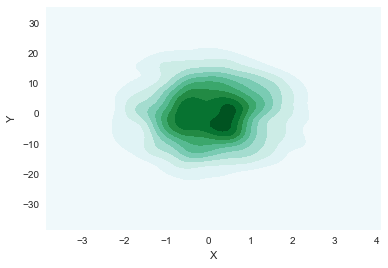

In [14]:
sns.kdeplot(dframe.X,dframe.Y,shade=True)

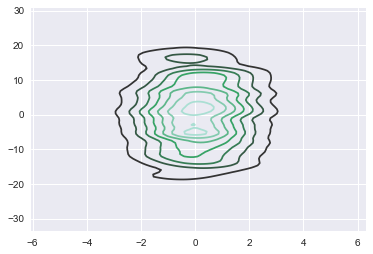

In [15]:
sns.kdeplot(dframe,bw=1)

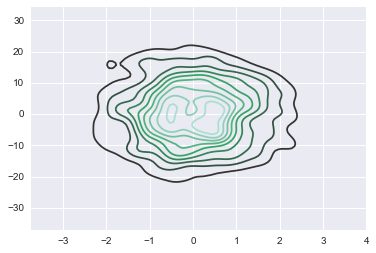

In [16]:
sns.kdeplot(dframe,bw='silverman')

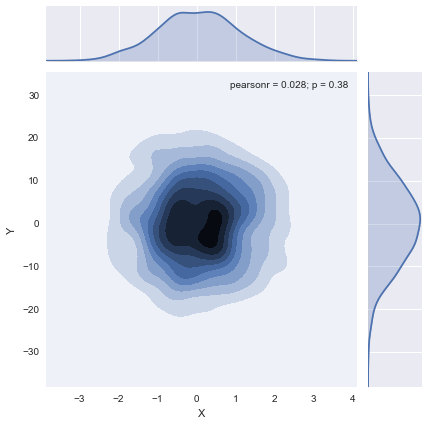

In [17]:
sns.jointplot('X','Y',dframe,kind='kde')